# MNIST DATASET

MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits




Every MNIST data point, every image, can be thought of as an array of numbers describing how dark each pixel is. Representation of 1 in pixels
[ {\scriptscriptstyle \begin{array}{cccccccccccccccccccccccccccc}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \bbox[#A0A0A0,1pt]{.6} & \bbox[#909090,1pt]{.8} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \bbox[#959595,1pt]{.7} & \bbox[#808080,1pt]{1} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \bbox[#959595,1pt]{.7} & \bbox[#808080,1pt]{1} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \bbox[#A5A5A5,1pt]{.5} & \bbox[#808080,1pt]{1} & \bbox[#B0B0B0,1pt]{.4} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \bbox[#808080,1pt]{1} & \bbox[#B0B0B0,1pt]{.4} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \bbox[#808080,1pt]{1} & \bbox[#B0B0B0,1pt]{.4} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \bbox[#808080,1pt]{1} & \bbox[#959595,1pt]{.7} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \bbox[#808080,1pt]{1} & \bbox[#808080,1pt]{1} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \bbox[#858585,1pt]{.9} & \bbox[#808080,1pt]{1} & \bbox[#E0E0E0,1pt]{.1} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \bbox[#C0C0C0,1pt]{.3} & \bbox[#808080,1pt]{1} & \bbox[#E0E0E0,1pt]{.1} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{array} 


# Principle Component Analysis(pca)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
  
mnist_data = pd.read_csv('mnist.csv')

In [2]:
mnist_data.loc[0]

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

In [3]:
label = mnist_data['label']
mnist_data= mnist_data.drop("label",axis=1)


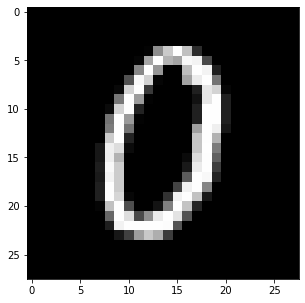

0


In [4]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(5,5))
idx = 5 #change the index for different different images

grid_data = mnist_data.iloc[idx].as_matrix().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(label[idx])

# Visualisation step by step guide without library

In [5]:
# Pick 20K data-points to work on for time-effeciency.

labels = label.head(20000)
data = mnist_data.head(20000)

print("the shape of sample data = ", data.shape)


the shape of sample data =  (20000, 784)


In [6]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)


(20000, 784)


In [7]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of variance matrix = ", covar_matrix.shape)


The shape of variance matrix =  (784, 784)


In [8]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh  

# the parameter 'eigvals' is defined (low value to high value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ",vectors.shape)
# converting the eigen vectors into (2,d) shape for easyness of further computations
vectors = vectors.T

print("Updated shape of eigen vectors = ",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vectors =  (2, 784)


In [11]:
# projecting the original data sample on the plane 

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
new_coordinates = -(new_coordinates)

print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)

 resultanat new data points' shape  (2, 784) X (784, 20000)  =  (2, 20000)


In [12]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T #Stack arrays in sequence vertically (row wise).

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.430697      -5.060862    1.0
1       6.242999      19.293148    0.0
2      -1.828611      -7.684498    1.0
3       5.585495      -0.440132    4.0
4       6.333250      26.597773    0.0


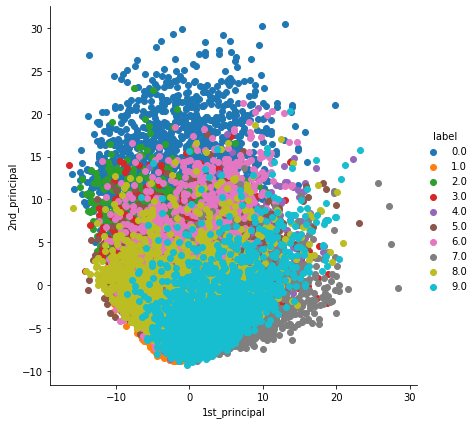

In [13]:
# ploting the 2d data points with seaborn
import seaborn as sns
sns.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

# PCA using Scikit-Learn

Easy to use with scikit-learn

In [14]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)



# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

shape of pca_reduced.shape =  (20000, 2)


In [15]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
pca_df.head(5)

,1st_principal,2nd_principal,label
0,-5.060823,-5.430379,1.0
1,19.293160,6.243058,0.0
2,-7.684568,-1.828853,1.0
3,-0.440092,5.585511,4.0
4,26.597793,6.333197,0.0


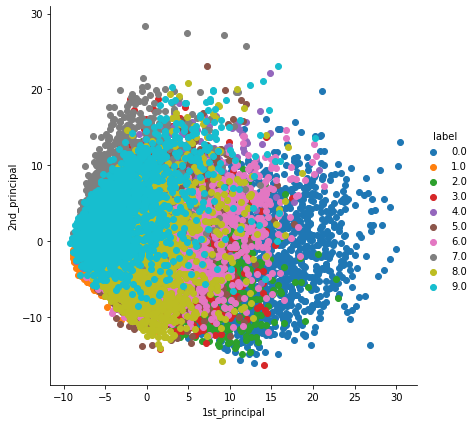

In [14]:
sns.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [15]:
# try it with 42k points

# t-SNE using Scikit-Learn

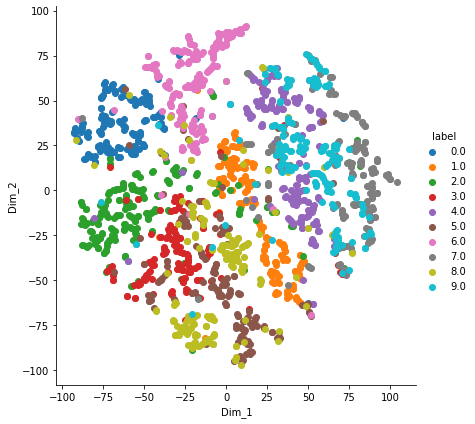

In [18]:

from sklearn.manifold import TSNE

# Going with lesser number of points since TSNE take time 
data = sample_data[0:2000,:]
labels = labels[0:2000]

model = TSNE(n_components=2,perplexity=5, random_state=0)

tsne_data = model.fit_transform(data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Observation

We can see the difference in the visualization between PCA and t-SNE

In [18]:
#Try with different perplexity and n_iter in TSNE